In [1]:
 # Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) 
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/opt/anaconda3/envs/python_proj/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_PH = df[(df['job_country'] == 'Philippines')].dropna(subset='salary_year_avg')

In [3]:
job_titles = df_PH['job_title_short'].value_counts().index[:6].tolist()

job_titles

['Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Business Analyst',
 'Senior Data Analyst',
 'Senior Data Engineer']

In [5]:
df_PH_top6 = df_PH[df_PH['job_title_short'].isin(job_titles)]

In [18]:
job_order = df_PH_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_order

Index(['Senior Data Analyst', 'Data Engineer', 'Data Analyst',
       'Senior Data Engineer', 'Data Scientist', 'Business Analyst'],
      dtype='object', name='job_title_short')

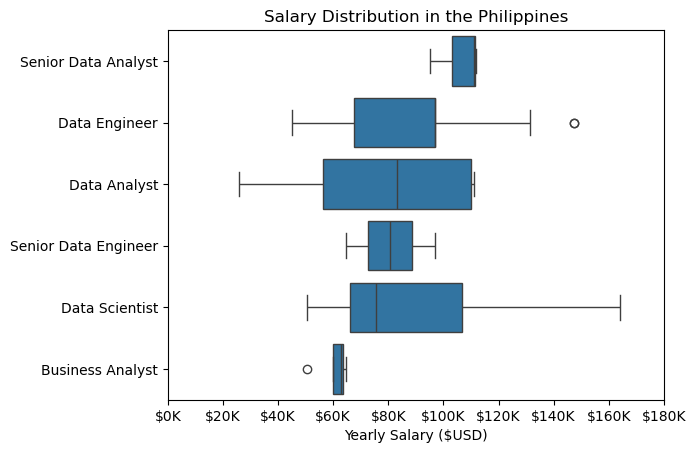

In [16]:
sns.boxplot(data=df_PH_top6, x='salary_year_avg', y='job_title_short', order=job_order)

plt.title('Salary Distribution in the Philippines')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.xlim(0, 180000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()

In [21]:
df_DA_PH = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Philippines')].copy()

df_DA_PH = df_DA_PH.dropna(subset=['salary_year_avg'])

In [22]:
df_DA_PH = df_DA_PH.explode('job_skills')

df_DA_PH[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
115695,111175.0,excel
115695,111175.0,tableau
147342,50400.0,None
166142,111175.0,sql
166142,111175.0,flow


In [33]:
df_DA_top_pay = df_DA_PH.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
bigquery,1,111175.0
flow,1,111175.0
sheets,1,111175.0
c,1,111175.0
zoom,1,111175.0
sharepoint,1,109500.0
qlik,1,100500.0
python,7,100500.0
tableau,7,100500.0


In [31]:
df_DA_skills = df_DA_PH.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
sql,13,100500.0
tableau,7,100500.0
python,7,100500.0
r,6,100500.0
powerpoint,3,100500.0
jira,2,100189.5
snowflake,3,98500.0
excel,9,89204.0
power bi,5,69900.0


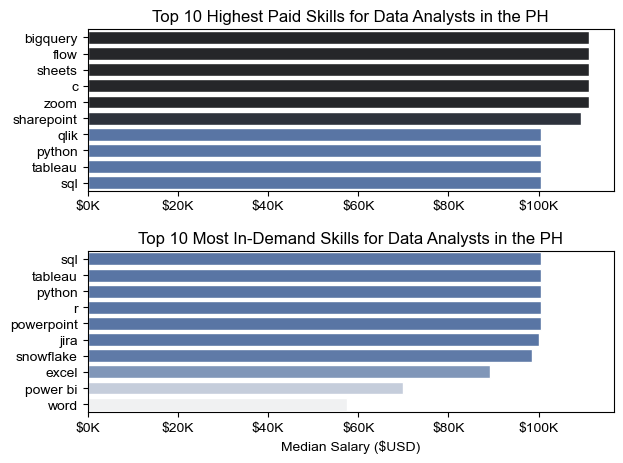

In [32]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')

sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()

ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts in the PH')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()

ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts in the PH')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

fig.tight_layout()
plt.show()